In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install opencv-python opencv-contrib-python

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
os.chdir('C:\\Users\\knikh\\Downloads\\archive_test')

# Define paths for annotations and images
annot = 'Airplanes_Annotations/Airplanes_Annotations/'
path = 'Images/Images'

In [5]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

42845.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\3675201011.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\3675201011.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\3675201011.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

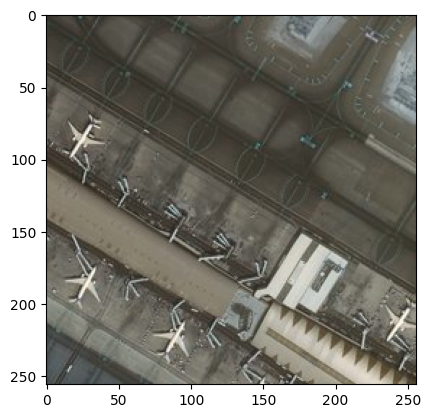

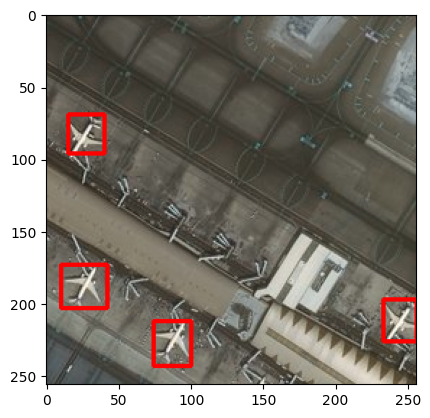

In [6]:
import os
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [10]:
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-contrib-python


Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\cli\base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pi


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

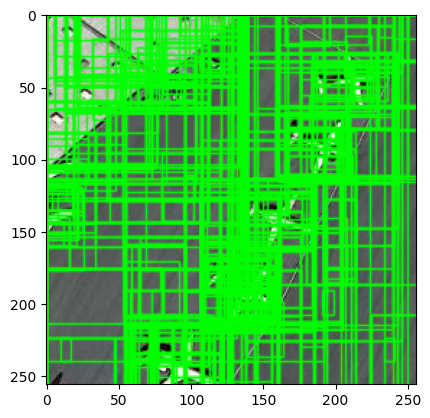

In [8]:
im = cv2.imread(os.path.join(path,"airplane_220.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [9]:
train_images=[]
train_labels=[]

In [10]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [11]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\knikh\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~~mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/39.0 MB ? eta -:--:--
                                             0.0/39.0 MB 660.6 kB/s eta 0:00:59
                                             0.1/39.0 MB 787.7 kB/s eta 0:00:50
                                             0.1/39.0 MB 901.1 kB/s eta 0:00:44
                                             0.1/39.0 MB 708.1 kB/s eta 0:00:55
                                             0.2/39.0 MB 794.9 kB/s eta 0:00:49
                                             0.3/39.0 MB 923.9 kB/s eta 0:00:42
                                             0.3/39.0 MB 923.9 kB/s eta 0:00:42
                                             0.3/39.0 MB 768.0 kB/s eta 0:00:51
                                             0.4/39.0 MB 969.0 kB/s eta 0:00:40
                                             0.4/39.0 MB 859.0 kB/s eta 0:00:45
                                             0.5/39.0 MB 950.1 kB/s eta 0:00:41
                                             0.5

In [12]:
z  = 0
for e,i in enumerate(os.listdir(annot)):
    try:
        if z <=500:
            
            if i.startswith("airplane"):
                filename = i.split(".")[0]+".jpg"
                print(e,filename)
                image = cv2.imread(os.path.join(path,filename))
                df = pd.read_csv(os.path.join(annot,i))
                gtvalues=[]
                for row in df.iterrows():
                    x1 = int(row[1][0].split(" ")[0])
                    y1 = int(row[1][0].split(" ")[1])
                    x2 = int(row[1][0].split(" ")[2])
                    y2 = int(row[1][0].split(" ")[3])
                    gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                ss.setBaseImage(image)
                ss.switchToSelectiveSearchFast()
                ssresults = ss.process()
                imout = image.copy()
                counter = 0
                falsecounter = 0
                flag = 0
                fflag = 0
                bflag = 0
                for e,result in enumerate(ssresults):
                    if e < 2000 and flag == 0:
                        for gtval in gtvalues:
                            x,y,w,h = result
                            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                            if counter < 30:
                                if iou > 0.70:
                                    timage = imout[y:y+h,x:x+w]
                                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                    train_images.append(resized)
                                    train_labels.append(1)
                                    counter += 1
                            else :
                                fflag =1
                            if falsecounter <30:
                                if iou < 0.3:
                                    timage = imout[y:y+h,x:x+w]
                                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                    train_images.append(resized)
                                    train_labels.append(0)
                                    falsecounter += 1
                            else :
                                bflag = 1
                        if fflag == 1 and bflag == 1:
                            print("inside")
                            flag = 1
            z = z + 1
        else:
            break
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

17 airplane_001.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
18 airplane_002.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

19 airplane_003.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

20 airplane_004.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
21 airplane_005.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
22 airplane_006.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

23 airplane_007.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
24 airplane_008.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

25 airplane_009.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

26 airplane_010.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

27 airplane_011.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

28 airplane_012.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
29 airplane_013.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

30 airplane_014.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

31 airplane_015.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

32 airplane_016.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

33 airplane_017.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

34 airplane_018.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

35 airplane_019.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

36 airplane_020.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

37 airplane_021.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

38 airplane_022.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

39 airplane_023.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

40 airplane_024.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

41 airplane_025.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

42 airplane_026.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

43 airplane_027.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

44 airplane_028.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

45 airplane_029.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

46 airplane_030.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

47 airplane_031.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

48 airplane_032.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

49 airplane_033.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

50 airplane_034.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

51 airplane_035.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

52 airplane_036.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

53 airplane_037.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

54 airplane_038.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

55 airplane_039.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

56 airplane_040.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

57 airplane_041.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
58 airplane_042.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

59 airplane_043.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

60 airplane_044.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

61 airplane_045.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
62 airplane_046.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

63 airplane_047.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

64 airplane_048.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

65 airplane_049.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

66 airplane_050.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

67 airplane_051.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

68 airplane_052.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

69 airplane_053.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
70 airplane_054.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

71 airplane_055.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

72 airplane_056.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

73 airplane_057.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

74 airplane_058.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

75 airplane_059.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

76 airplane_060.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

77 airplane_061.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

78 airplane_062.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
79 airplane_063.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

80 airplane_064.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

81 airplane_065.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

82 airplane_066.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

83 airplane_067.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

84 airplane_068.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

85 airplane_069.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

86 airplane_070.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

87 airplane_071.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

88 airplane_072.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

89 airplane_073.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

90 airplane_074.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

91 airplane_075.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
92 airplane_076.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

93 airplane_077.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

94 airplane_078.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

95 airplane_079.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

96 airplane_080.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

97 airplane_081.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

98 airplane_082.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

99 airplane_083.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
100 airplane_084.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

101 airplane_085.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
102 airplane_086.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

103 airplane_087.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

104 airplane_088.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

105 airplane_089.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

106 airplane_090.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

107 airplane_091.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

108 airplane_092.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

109 airplane_093.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

110 airplane_094.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

111 airplane_095.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

112 airplane_096.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
113 airplane_097.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
114 airplane_098.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

115 airplane_099.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

116 airplane_100.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

117 airplane_101.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

118 airplane_102.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

119 airplane_103.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

120 airplane_104.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

121 airplane_105.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

122 airplane_106.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

123 airplane_107.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

124 airplane_108.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
125 airplane_109.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

126 airplane_110.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

127 airplane_111.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

128 airplane_112.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
129 airplane_113.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

130 airplane_114.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

131 airplane_115.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

132 airplane_116.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

133 airplane_117.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

134 airplane_118.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

135 airplane_119.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
136 airplane_120.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
137 airplane_121.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
138 airplane_122.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

139 airplane_123.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
140 airplane_124.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

141 airplane_125.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

142 airplane_126.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
143 airplane_127.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

144 airplane_128.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

145 airplane_129.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

146 airplane_130.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

147 airplane_131.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

148 airplane_132.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

149 airplane_133.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

150 airplane_134.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

151 airplane_135.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

152 airplane_136.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
153 airplane_137.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
154 airplane_138.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

155 airplane_139.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

156 airplane_140.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

157 airplane_141.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

158 airplane_142.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

159 airplane_143.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

160 airplane_144.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

161 airplane_145.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

162 airplane_146.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

163 airplane_147.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

164 airplane_148.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

165 airplane_149.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

166 airplane_150.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

167 airplane_151.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
168 airplane_152.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

169 airplane_153.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

170 airplane_154.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

171 airplane_155.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

172 airplane_156.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

173 airplane_157.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

174 airplane_158.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

175 airplane_159.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

176 airplane_160.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

177 airplane_161.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

178 airplane_162.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

179 airplane_163.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

180 airplane_164.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

181 airplane_165.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

182 airplane_166.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

183 airplane_167.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

184 airplane_168.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

185 airplane_169.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

186 airplane_170.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

187 airplane_171.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

188 airplane_172.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

189 airplane_173.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

190 airplane_174.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

191 airplane_175.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

192 airplane_176.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

193 airplane_177.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

194 airplane_178.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

195 airplane_179.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

196 airplane_180.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

197 airplane_181.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

198 airplane_182.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

199 airplane_183.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

200 airplane_184.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

201 airplane_185.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

202 airplane_186.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

203 airplane_187.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

204 airplane_188.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

205 airplane_189.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

206 airplane_190.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
207 airplane_191.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

208 airplane_192.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

209 airplane_193.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

210 airplane_194.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

211 airplane_195.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

212 airplane_196.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

213 airplane_197.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

214 airplane_198.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

215 airplane_199.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
216 airplane_200.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

217 airplane_201.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

218 airplane_202.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

219 airplane_203.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

220 airplane_204.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

221 airplane_205.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

222 airplane_206.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

223 airplane_207.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

224 airplane_208.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

225 airplane_209.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

226 airplane_210.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

227 airplane_211.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

228 airplane_212.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

229 airplane_213.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
230 airplane_214.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
231 airplane_215.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

232 airplane_216.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

233 airplane_217.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

234 airplane_218.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

235 airplane_219.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

236 airplane_220.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

237 airplane_221.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

238 airplane_222.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

239 airplane_223.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
240 airplane_224.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

241 airplane_225.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
242 airplane_226.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

243 airplane_227.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

244 airplane_228.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

245 airplane_229.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

246 airplane_230.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

247 airplane_231.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

248 airplane_232.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

249 airplane_233.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

250 airplane_234.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

251 airplane_235.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

252 airplane_236.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

253 airplane_237.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

254 airplane_238.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

255 airplane_239.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

256 airplane_240.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

257 airplane_241.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

258 airplane_242.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

259 airplane_243.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

260 airplane_244.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

261 airplane_245.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

262 airplane_246.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

263 airplane_247.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

264 airplane_248.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

265 airplane_249.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

266 airplane_250.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

267 airplane_251.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

268 airplane_252.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

269 airplane_253.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

270 airplane_254.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

271 airplane_255.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

272 airplane_256.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

273 airplane_257.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

274 airplane_258.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

275 airplane_259.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

276 airplane_260.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

277 airplane_261.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

278 airplane_262.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

279 airplane_263.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

280 airplane_264.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
281 airplane_265.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

282 airplane_266.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

283 airplane_267.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

284 airplane_268.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

285 airplane_269.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

286 airplane_270.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

287 airplane_271.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

288 airplane_272.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

289 airplane_273.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

290 airplane_274.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

291 airplane_275.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

292 airplane_276.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
293 airplane_277.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

294 airplane_278.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

295 airplane_279.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

296 airplane_280.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

297 airplane_281.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

298 airplane_282.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

299 airplane_283.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

300 airplane_284.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

301 airplane_285.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

302 airplane_286.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

303 airplane_287.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

304 airplane_288.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

305 airplane_289.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
306 airplane_290.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

307 airplane_291.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
308 airplane_292.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

309 airplane_293.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

310 airplane_294.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

311 airplane_295.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

312 airplane_296.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

313 airplane_297.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
314 airplane_298.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

315 airplane_299.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

316 airplane_300.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

317 airplane_301.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
318 airplane_302.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

319 airplane_303.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

320 airplane_304.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

321 airplane_305.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
322 airplane_306.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
323 airplane_307.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

324 airplane_308.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

325 airplane_309.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

326 airplane_310.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

327 airplane_311.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

328 airplane_312.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

329 airplane_313.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

330 airplane_314.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

331 airplane_315.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
332 airplane_316.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

333 airplane_317.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

334 airplane_318.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

335 airplane_319.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

336 airplane_320.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

337 airplane_321.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

338 airplane_322.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

339 airplane_323.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

340 airplane_324.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

341 airplane_325.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

342 airplane_326.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
343 airplane_327.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

344 airplane_328.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
345 airplane_329.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

346 airplane_330.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

347 airplane_331.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

348 airplane_332.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
349 airplane_333.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

350 airplane_334.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

351 airplane_335.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

352 airplane_336.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

353 airplane_337.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

354 airplane_338.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
355 airplane_339.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

356 airplane_340.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

357 airplane_341.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

358 airplane_342.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

359 airplane_343.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
360 airplane_344.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

361 airplane_345.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

362 airplane_346.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

363 airplane_347.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
364 airplane_348.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

365 airplane_349.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

366 airplane_350.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

367 airplane_351.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

368 airplane_352.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

369 airplane_353.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

370 airplane_354.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

371 airplane_355.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

372 airplane_356.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

373 airplane_357.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

374 airplane_358.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

375 airplane_359.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

376 airplane_360.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

377 airplane_361.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

378 airplane_362.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
379 airplane_363.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

380 airplane_364.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

381 airplane_365.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

382 airplane_366.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

383 airplane_367.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

384 airplane_368.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

385 airplane_369.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

386 airplane_370.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

387 airplane_371.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

388 airplane_372.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

389 airplane_373.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
390 airplane_374.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

391 airplane_375.jpg
392 airplane_376.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

393 airplane_377.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
394 airplane_378.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

395 airplane_379.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

396 airplane_380.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

397 airplane_381.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

398 airplane_382.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
399 airplane_383.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
400 airplane_384.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

401 airplane_385.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
402 airplane_386.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

403 airplane_387.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

404 airplane_388.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
405 airplane_389.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

406 airplane_390.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

407 airplane_391.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

408 airplane_392.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

409 airplane_393.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

410 airplane_394.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

411 airplane_395.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

412 airplane_396.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

413 airplane_397.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

414 airplane_398.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

415 airplane_399.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

416 airplane_400.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

417 airplane_401.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

418 airplane_402.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

419 airplane_403.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

420 airplane_404.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

421 airplane_405.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

422 airplane_406.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

423 airplane_407.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

424 airplane_408.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

425 airplane_409.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

426 airplane_410.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

427 airplane_411.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

428 airplane_412.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

429 airplane_413.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

430 airplane_414.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

431 airplane_415.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

432 airplane_416.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

433 airplane_417.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

434 airplane_418.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

435 airplane_419.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
436 airplane_420.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

437 airplane_421.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

438 airplane_422.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

439 airplane_423.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

440 airplane_424.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

441 airplane_425.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

442 airplane_426.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

443 airplane_427.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
444 airplane_428.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

445 airplane_429.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

446 airplane_430.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

447 airplane_431.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

448 airplane_432.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

449 airplane_433.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

450 airplane_434.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
451 airplane_435.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

452 airplane_436.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

453 airplane_437.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

454 airplane_438.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

455 airplane_439.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

456 airplane_440.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

457 airplane_441.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

458 airplane_442.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

459 airplane_443.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

460 airplane_444.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

461 airplane_445.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

462 airplane_446.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

463 airplane_447.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

464 airplane_448.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

465 airplane_449.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

466 airplane_450.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

467 airplane_451.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

468 airplane_452.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
469 airplane_453.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

470 airplane_454.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

471 airplane_455.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

472 airplane_456.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

473 airplane_457.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

474 airplane_458.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

475 airplane_459.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

476 airplane_460.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

477 airplane_461.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

478 airplane_462.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

479 airplane_463.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

480 airplane_464.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

481 airplane_465.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

482 airplane_466.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

483 airplane_467.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

484 airplane_468.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

485 airplane_469.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

inside
486 airplane_470.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

487 airplane_471.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

488 airplane_472.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

489 airplane_473.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

490 airplane_474.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

491 airplane_475.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

492 airplane_476.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

493 airplane_477.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

494 airplane_478.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

495 airplane_479.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

496 airplane_480.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

497 airplane_481.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

498 airplane_482.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

499 airplane_483.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

500 airplane_484.jpg


C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
C:\Users\knikh\AppData\Local\Temp\ipykernel_46892\4258140959.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split("

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [14]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [18]:
for layer in (vggmodel.layers)[:15]:
    #print(layers)
    layer.trainable = False

X= vggmodel.layers[-2].output

predictions = Dense(2, activation="softmax")(X)

model_final = Model(inputs = vggmodel.input, outputs = predictions)


opt = Adam(learning_rate=0.0001)

model_final.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

model_final.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 126,633,474 (483.07 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [19]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(np.array(train_labels))

del train_labels

In [20]:
X_train, X_test, y_train, y_test = train_test_split(np.array(train_images),Y,test_size=0.10)
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

del train_images

In [21]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train[0:10000], y=y_train[0:10000])

tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("R-CNN.keras", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [23]:
hist = model_final.fit(x=traindata, epochs=10, steps_per_epoch=50, validation_data=testdata, validation_steps=2, callbacks=[checkpoint, early])

Epoch 1/10


c:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7925 - loss: 0.8782
Epoch 1: val_loss improved from inf to 0.20470, saving model to R-CNN.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 306s 6s/step - accuracy: 0.7938 - loss: 0.8705 - val_accuracy: 0.9062 - val_loss: 0.2047
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9286 - loss: 0.1968
Epoch 2: val_loss did not improve from 0.20470
50/50 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.9287 - loss: 0.1969 - val_accuracy: 0.8906 - val_loss: 0.2489
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9140 - loss: 0.2418
Epoch 3: val_loss improved from 0.20470 to 0.07396, saving model to R-CNN.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 293s 6s/step - accuracy: 0.9143 - loss: 0.2412 - val_accuracy: 1.0000 - val_loss: 0.0740
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9515 - loss: 0.1621
Epoch 4: val_loss did not improve from 0.07396
50/50 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.9514 - loss: 0.1622 - val_a

c:\Users\knikh\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 7: val_loss did not improve from 0.07396
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9468 - loss: 0.1595 - val_accuracy: 0.8906 - val_loss: 0.2488
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.9443 - loss: 0.1825 
Epoch 8: val_loss did not improve from 0.07396
50/50 ━━━━━━━━━━━━━━━━━━━━ 733s 14s/step - accuracy: 0.9443 - loss: 0.1820 - val_accuracy: 0.9531 - val_loss: 0.1952
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9487 - loss: 0.1650
Epoch 9: val_loss did not improve from 0.07396
50/50 ━━━━━━━━━━━━━━━━━━━━ 277s 6s/step - accuracy: 0.9487 - loss: 0.1649 - val_accuracy: 0.9219 - val_loss: 0.1563
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9526 - loss: 0.1510
Epoch 10: val_loss did not improve from 0.07396
50/50 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.9524 - loss: 0.1512 - val_accuracy: 0.9688 - val_loss: 0.1133


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

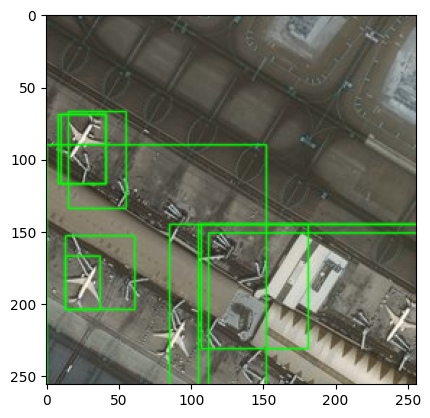

In [24]:
z = 0
for e, i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path, i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        
        for e, result in enumerate(ssresults):
            if e < 2000:
                x, y, w, h = result
                timage = imout[y:y+h, x:x+w]
                resized = cv2.resize(timage, (224, 224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis = 0)
                out = model_final.predict(img)
                
                if out[0][0] > 0.70:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        break

In [26]:
model_final.save("R-CNN.keras")


In [28]:
# Get predicted probabilities
y_probs = model_final.predict(X_test)  # shape (n_samples, 2)

# Get predicted class labels
y_pred = np.argmax(y_probs, axis=1)    # shape (n_samples,)
y_true = np.argmax(y_test, axis=1)     # assuming y_test is one-hot


67/67 ━━━━━━━━━━━━━━━━━━━━ 367s 5s/step


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["class0", "class1"]))

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1-score :", f1_score(y_true, y_pred))


Confusion Matrix:
[[ 690   40]
 [  79 1311]]

Classification Report:
              precision    recall  f1-score   support

      class0       0.90      0.95      0.92       730
      class1       0.97      0.94      0.96      1390

    accuracy                           0.94      2120
   macro avg       0.93      0.94      0.94      2120
weighted avg       0.95      0.94      0.94      2120

Accuracy : 0.9438679245283019
Precision: 0.9703923019985197
Recall   : 0.9431654676258993
F1-score : 0.9565851878876322
